# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fika Afhamul Fuscha
- **Email:** fikaafhamul@gmail.com
- **ID Dicoding:** fikaafhamul

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda sepanjang tahun?
- Bagaimana perbandingan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar sepanjang tahun?
- Apa pengaruh hari kerja dan akhir pekan/hari libur terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat Tabel Per-Hari

In [2]:
day_df = pd.read_csv("dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat Tabel Per-Jam

In [3]:
hour_df = pd.read_csv("dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat data yang beragam dari berbagai sumber, termasuk data penyewaan sepeda, data cuaca, dan data demografis pengguna.

### Assessing Data

#### Menilai Data Per-Hari

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data Tabel Per-Jam

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat Missing value, Duplicate data, dan Inaccurate Value
- Terdapat kesalahan tipe data pada kolom dteday

### Cleaning Data

#### Merubah Tipe Data dalam Tabel Day_df

In [12]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Merubah Tipe Data dalam Tabel Hour_df

In [14]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Merubah Nilai Tabel Year dalam day_df

In [16]:
day_df.yr.value_counts()

yr
1    366
0    365
Name: count, dtype: int64

In [17]:
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})

In [18]:
day_df.yr.value_counts()

yr
2012    366
2011    365
Name: count, dtype: int64

#### Merubah Nilai Tabel Year dalam hour_df

In [19]:
hour_df.yr.value_counts()

yr
1    8734
0    8645
Name: count, dtype: int64

In [20]:
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})

In [21]:
hour_df.yr.value_counts()

yr
2012    8734
2011    8645
Name: count, dtype: int64

#### Merubah Nama Bulan dalam Tabel Mnth

In [22]:
day_df.mnth.value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [23]:
day_df['mnth'] = day_df['mnth'].replace({1: "Januari", 
                                         2: "Februari", 
                                         3: "Maret", 
                                         4: "April", 
                                         5: "Mei", 
                                         6: "Juni", 
                                         7: "Juli",
                                         8: "Agustus",
                                         9: "September",
                                         10: "Oktober",
                                         11: "November",
                                         12: "Desember"})

In [24]:
day_df.mnth.value_counts()

mnth
Januari      62
Maret        62
Juli         62
Mei          62
Desember     62
Oktober      62
Agustus      62
April        60
September    60
Juni         60
November     60
Februari     57
Name: count, dtype: int64

#### Merubah Nilai Workingday

In [25]:
day_df.workingday.value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [26]:
day_df['workingday'] = day_df['workingday'].replace({0: "Hari Libur", 1: "Hari Kerja"})

In [27]:
day_df.workingday.value_counts()

workingday
Hari Kerja    500
Hari Libur    231
Name: count, dtype: int64

#### Merubah Nilai Tabel Weathersit

In [28]:
hour_df.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [29]:
hour_df['weathersit'] = hour_df['weathersit'].replace({1: "Cerah", 2: "Berawan", 3: "Hujan Ringan", 4: "Hujan Lebat"})

In [30]:
hour_df.weathersit.value_counts()

weathersit
Cerah           11413
Berawan          4544
Hujan Ringan     1419
Hujan Lebat         3
Name: count, dtype: int64

**Insight:**
- Merubah tipe data dalam tabel datetime
- Melakukan label encoding dari nilai-nilai numerik menjadi representasi yang lebih bermakna

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
day_df.describe()

,instant,dteday,season,yr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,0.028728,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,0.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,0.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,1.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,0.167155,2.004787,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [32]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr   mnth                                 
2011 Agustus     28842      107849  136691
     April       22346       72524   94870
     Desember     8448       78875   87323
     Februari     6242       41973   48215
     Januari      3073       35116   38189
     Juli        36452      104889  141341
     Juni        30612      112900  143512
     Maret       12826       51219   64045
     Mei         31050      104771  135821
     November    15594       86573  102167
     Oktober     25222       98289  123511
     September   26545      100873  127418
2012 Agustus     43197      171306  214503
     April       38456      135768  174224
     Desember    13245      110468  123713
     Februari     8721       94416  103137
     Januari      8969       87775   96744
     Juli        41705      161902  203607
     Juni        43294      159536  202830
     Maret       31618      133257  164875
     Mei         44235      151630  195865
     November    21009      131655  152664
     Oktober     34538      164303  198841
     September   43778      174795  218573

In [33]:
day_df.groupby(by=["yr", "workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered      cnt
yr   workingday                             
2011 Hari Kerja  118354      737910   856264
     Hari Libur  128898      257941   386839
2012 Hari Kerja  184931     1251215  1436146
     Hari Libur  187834      425596   613430

In [34]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [35]:
hour_df.groupby(by=["yr", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered      cnt
yr   weathersit                               
2011 Berawan        53809      246710   300519
     Cerah         183733      691320   875053
     Hujan Lebat        1          35       36
     Hujan Ringan    9709       57786    67495
2012 Berawan        80672      414761   495433
     Cerah         279012     1184108  1463120
     Hujan Lebat        7         180      187
     Hujan Ringan   13074       77762    90836

**Insight:**
- Selama dua tahun terakhir, kategori penyewa terdaftar mencatatkan jumlah penyewa sepeda terbanyak
- Jumlah penyewa sepeda pada hari kerja ternyata lebih tinggi dibandingkan dengan hari libur
- Cuaca memiliki dampak yang signifikan terhadap pola penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda sepanjang tahun?

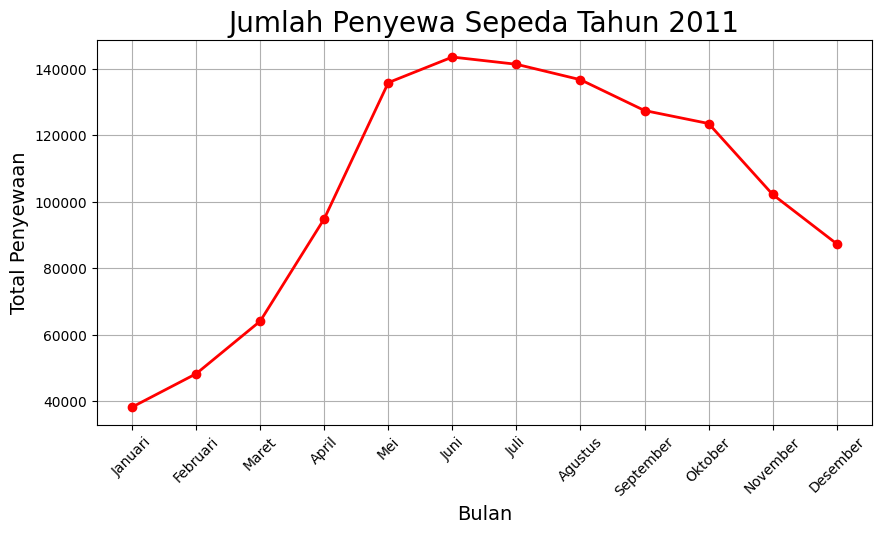

In [36]:
bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
tren = day_df[day_df['yr'] == 2011].groupby('mnth').agg({
    "cnt": "sum"
}).reset_index()
tren.rename(columns={
    "cnt": "Total Penyewaan",
}, inplace=True)
tren['mnth'] = pd.Categorical(tren['mnth'], categories=bulan, ordered=True)
tren = tren.sort_values('mnth')
plt.figure(figsize=(10, 5)) 
plt.plot(
    tren["mnth"],
    tren["Total Penyewaan"],
    marker='o', 
    linewidth=2,
    color="red"
)
plt.title("Jumlah Penyewa Sepeda Tahun 2011", loc="center", fontsize=20) 
plt.xticks(rotation=45, fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.grid()
plt.show()

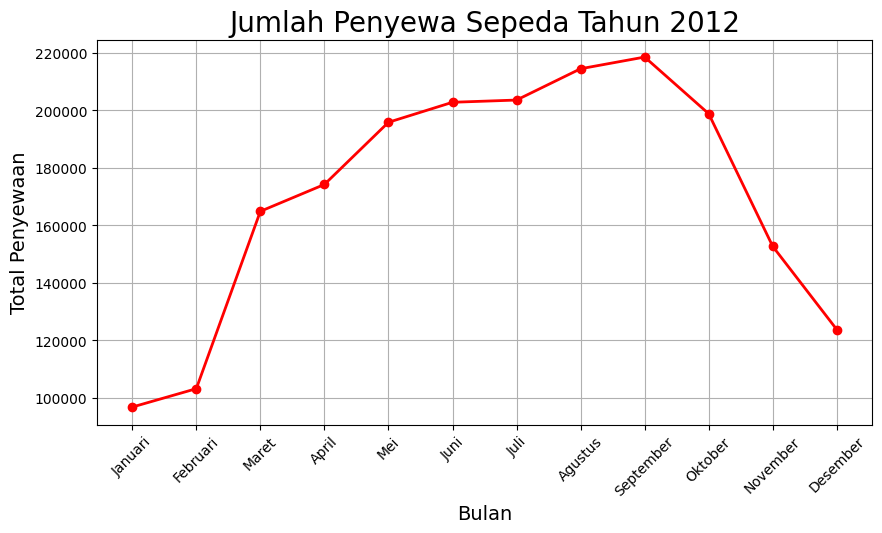

In [37]:
tren = day_df[day_df['yr'] == 2012].groupby('mnth').agg({
    "cnt": "sum"
}).reset_index()
tren.rename(columns={
    "cnt": "Total Penyewaan",
}, inplace=True)
tren['mnth'] = pd.Categorical(tren['mnth'], categories=bulan, ordered=True)
tren = tren.sort_values('mnth')
plt.figure(figsize=(10, 5)) 
plt.plot(
    tren["mnth"],
    tren["Total Penyewaan"],
    marker='o', 
    linewidth=2,
    color="red"
)
plt.title("Jumlah Penyewa Sepeda Tahun 2012", loc="center", fontsize=20) 
plt.xticks(rotation=45, fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.grid()
plt.show()

### Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar sepanjang tahun?

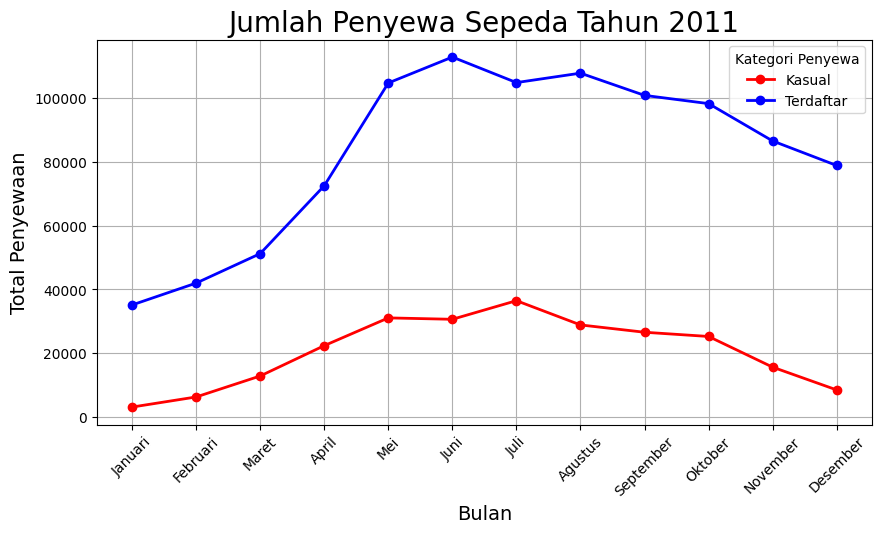

In [38]:
tren = day_df[day_df['yr'] == 2011].groupby('mnth').agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()
tren.rename(columns={
    "casual": "Kasual",
    "registered": "Terdaftar"
}, inplace=True)
tren['mnth'] = pd.Categorical(tren['mnth'], categories=bulan, ordered=True)
tren = tren.sort_values('mnth')
plt.figure(figsize=(10, 5)) 
plt.plot(
    tren["mnth"],
    tren["Kasual"],
    marker='o', 
    linewidth=2,
    color="red",
    label="Kasual" 
)
plt.plot(
    tren["mnth"],
    tren["Terdaftar"],
    marker='o', 
    linewidth=2,
    color="blue",
    label="Terdaftar" 
)
plt.title("Jumlah Penyewa Sepeda Tahun 2011", loc="center", fontsize=20) 
plt.xticks(rotation=45, fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.legend(title="Kategori Penyewa", fontsize=10)
plt.grid()
plt.show()

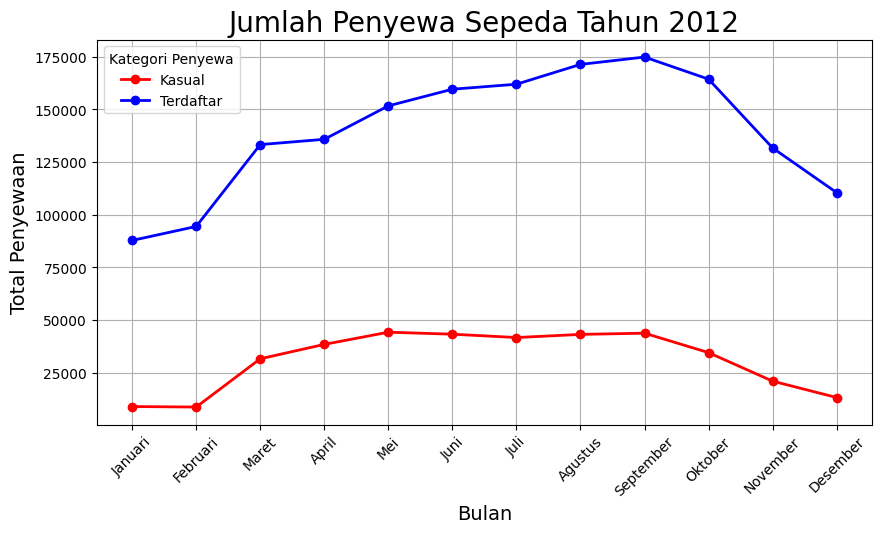

In [39]:
tren = day_df[day_df['yr'] == 2012].groupby('mnth').agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()
tren.rename(columns={
    "casual": "Kasual",
    "registered": "Terdaftar"
}, inplace=True)
tren['mnth'] = pd.Categorical(tren['mnth'], categories=bulan, ordered=True)
tren = tren.sort_values('mnth')
plt.figure(figsize=(10, 5)) 
plt.plot(
    tren["mnth"],
    tren["Kasual"],
    marker='o', 
    linewidth=2,
    color="red",
    label="Kasual" 
)
plt.plot(
    tren["mnth"],
    tren["Terdaftar"],
    marker='o', 
    linewidth=2,
    color="blue",
    label="Terdaftar" 
)
plt.title("Jumlah Penyewa Sepeda Tahun 2012", loc="center", fontsize=20) 
plt.xticks(rotation=45, fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.legend(title="Kategori Penyewa", fontsize=10)
plt.grid()
plt.show()

### Pertanyaan 3: Apa pengaruh hari kerja dan akhir pekan/hari libur terhadap jumlah penyewaan sepeda?

C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\3669643974.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\3669643974.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


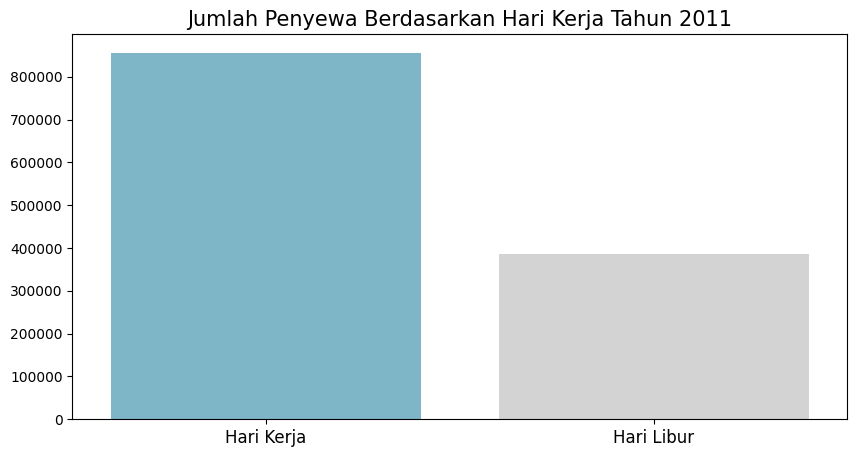

In [40]:
tren = day_df[day_df['yr'] == 2011].groupby('workingday').agg({
    "cnt": "sum"
}).reset_index()
tren.rename(columns={
    "cnt": "Total Penyewaan",
}, inplace=True)
plt.figure(figsize=(10, 5)) 
sns.barplot(
    y="Total Penyewaan", 
    x="workingday",
    data=tren.sort_values(by="Total Penyewaan", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Jumlah Penyewa Berdasarkan Hari Kerja Tahun 2011", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\216709263.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\216709263.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


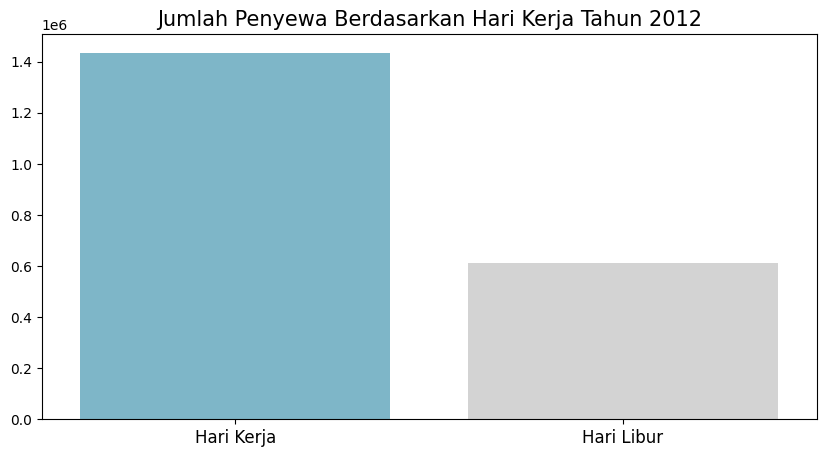

In [41]:
tren = day_df[day_df['yr'] == 2012].groupby('workingday').agg({
    "cnt": "sum"
}).reset_index()
tren.rename(columns={
    "cnt": "Total Penyewaan",
}, inplace=True)
plt.figure(figsize=(10, 5)) 
sns.barplot(
    y="Total Penyewaan", 
    x="workingday",
    data=tren.sort_values(by="Total Penyewaan", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Jumlah Penyewa Berdasarkan Hari Kerja Tahun 2012", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewa sepeda?

C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\1921089231.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


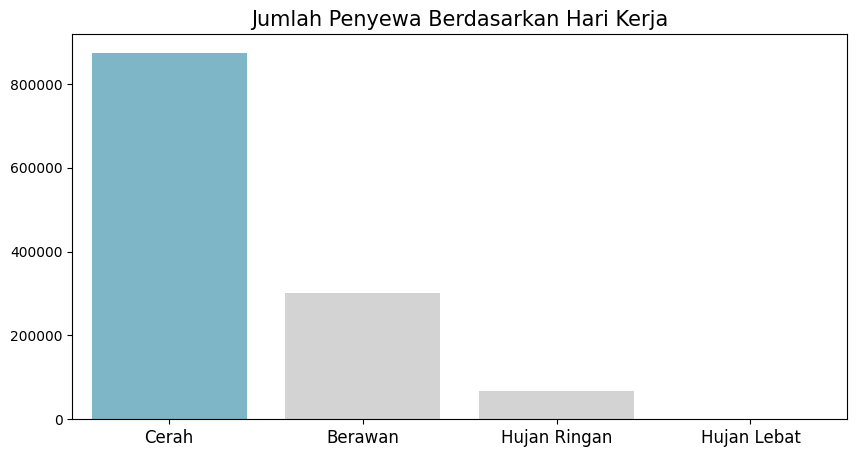

In [42]:
tren = hour_df[hour_df['yr'] == 2011].groupby('weathersit').agg({
    "cnt": "sum"
}).reset_index()
tren.rename(columns={
    "cnt": "Total Penyewaan",
}, inplace=True)
plt.figure(figsize=(10, 5)) 
sns.barplot(
    y="Total Penyewaan", 
    x="weathersit",
    data=tren.sort_values(by="Total Penyewaan", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Jumlah Penyewa Berdasarkan Hari Kerja", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\3348010273.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


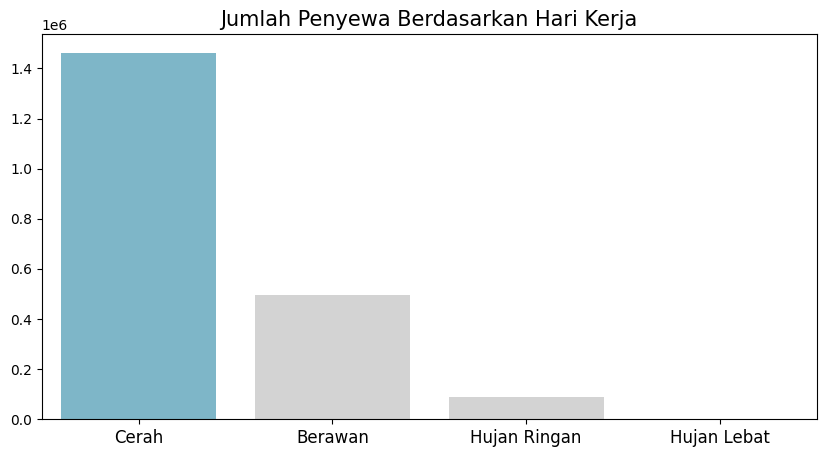

In [43]:
tren = hour_df[hour_df['yr'] == 2012].groupby('weathersit').agg({
    "cnt": "sum"
}).reset_index()
tren.rename(columns={
    "cnt": "Total Penyewaan",
}, inplace=True)
plt.figure(figsize=(10, 5)) 
sns.barplot(
    y="Total Penyewaan", 
    x="weathersit",
    data=tren.sort_values(by="Total Penyewaan", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Jumlah Penyewa Berdasarkan Hari Kerja", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Tren jumlah penyewa sepeda menunjukkan pola yang berbeda setiap tahunnya
- Jumlah penyewa sepeda dalam kategori terdaftar lebih banyak dibandingkan dengan kategori kasual.
- Jumlah penyewa sepeda tertinggi terjadi pada hari kerja.
- Hari-hari dengan cuaca cerah cenderung memiliki jumlah penyewa yang lebih tinggi.

## Analisis Lanjutan (Opsional)

In [44]:
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "dteday": "max", # mengambil tanggal order terakhir
    "cnt": "sum", # menghitung jumlah order
})
rfm_df.columns = ["instant", "max_order_timestamp", "frequency"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,recency
0,1,985,730
1,2,801,729
2,3,1349,728
3,4,1562,727
4,5,1600,726


C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\1930806252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Lenovo G410\AppData\Local\Temp\ipykernel_11904\1930806252.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])


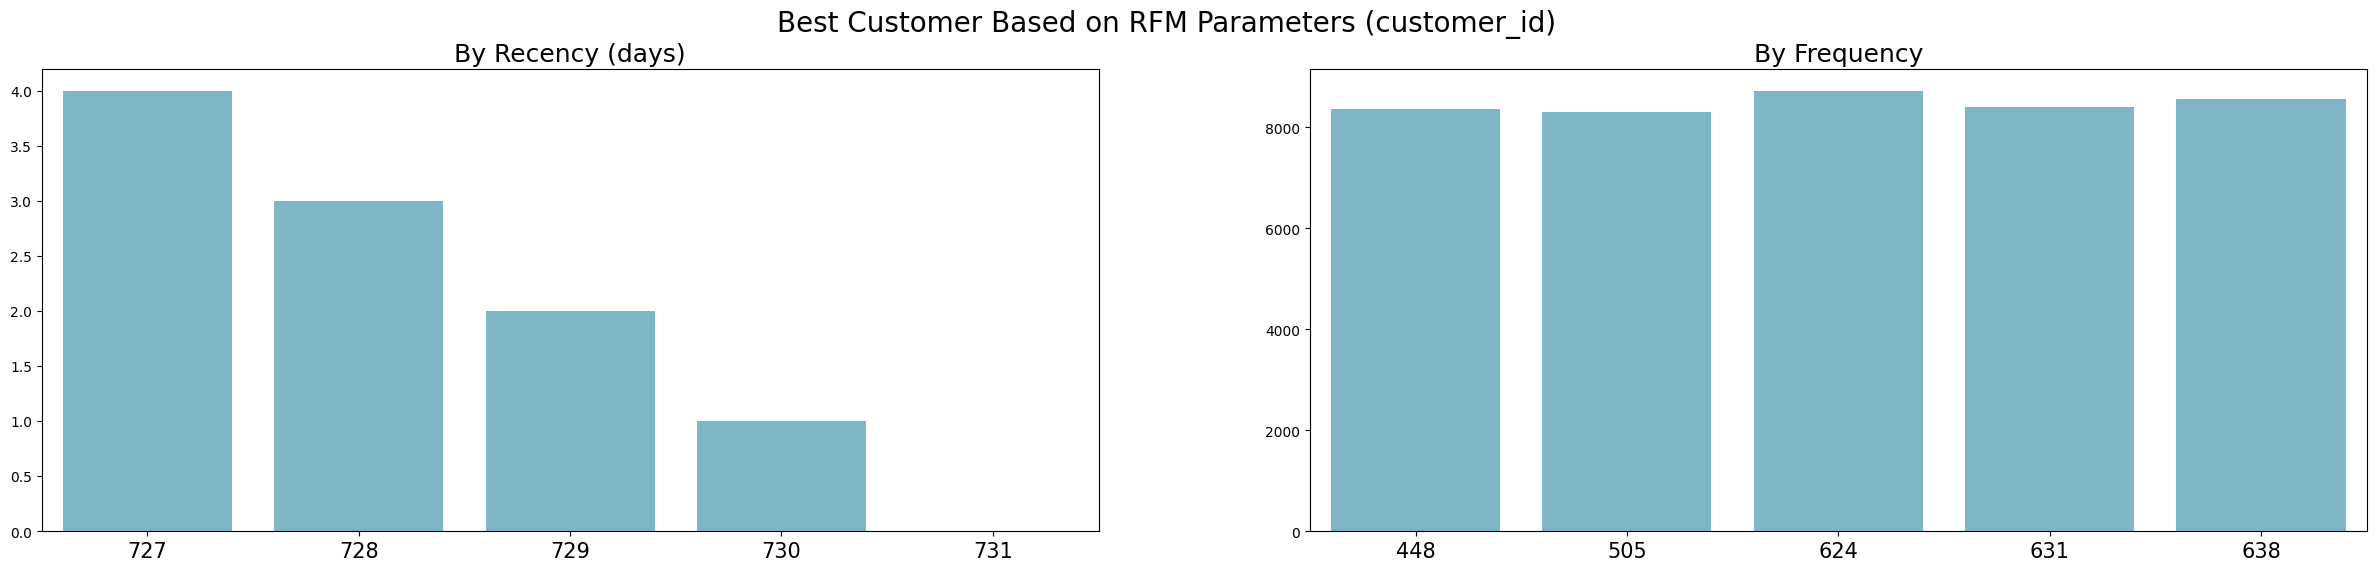

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Tren jumlah penyewa sepeda menunjukkan pola yang berbeda setiap tahunnya
- Jumlah penyewa sepeda dalam kategori terdaftar lebih banyak dibandingkan dengan kategori kasual.
- Jumlah penyewa sepeda tertinggi terjadi pada hari kerja.
- Hari-hari dengan cuaca cerah cenderung memiliki jumlah penyewa yang lebih tinggi.